In [1]:
from scipy import ndimage
import matplotlib.pyplot as plt
import imageio
import PIL
import numpy as np
import cv2 
import skimage

### Фильтры

In [2]:
orig_pic = PIL.Image.open(f"../data/class_black_mouse_OFT_gray_back/OFT_control_01$000152&03_F00175_a_.bmp")
orig_pic_array = np.array(orig_pic)

#### Фильтр Гаусса

(-0.5, 223.5, 223.5, -0.5)

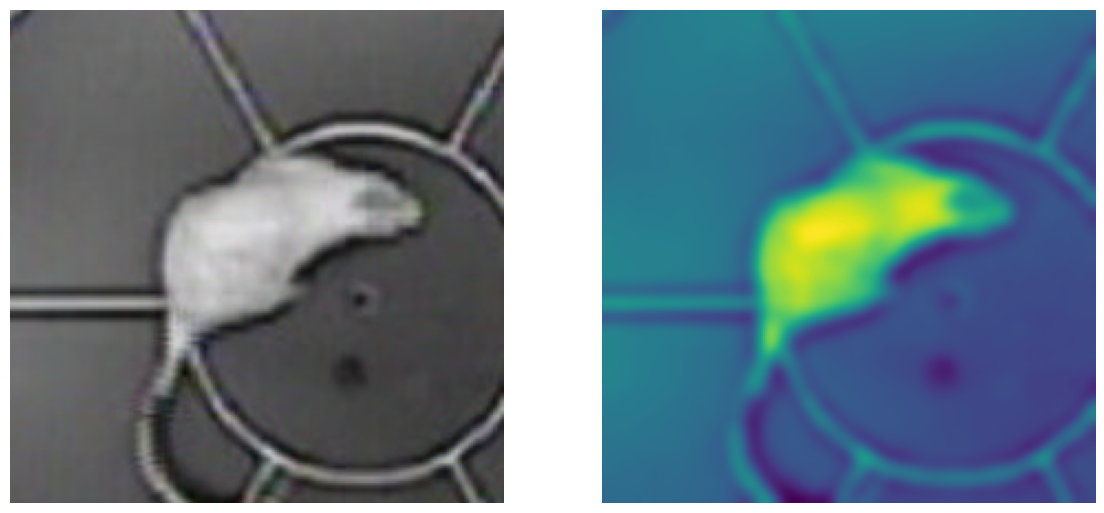

In [3]:
sigma = 3

filtered_pic = ndimage.gaussian_filter(orig_pic_array, sigma)
filtered_pic_converted = PIL.Image.fromarray(np.uint8(filtered_pic)).convert('L')

plt.figure(figsize=(14, 10),  frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_pic_converted)
plt.axis('off')

#### Фильтр Робертса

(-0.5, 223.5, 223.5, -0.5)

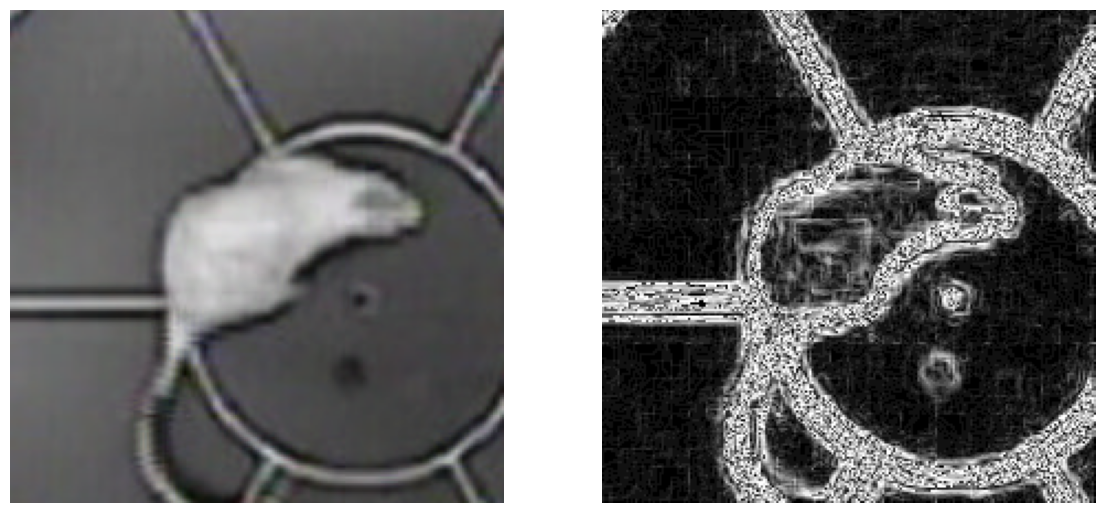

In [4]:
roberts_cross_v = np.array([[1, 0 ],
                            [0,-1 ]])
roberts_cross_h = np.array([[ 0, 1 ],
                            [ -1, 0 ]])

pic_mono = orig_pic.convert("L")
v = ndimage.convolve(pic_mono, roberts_cross_v)
h = ndimage.convolve(pic_mono, roberts_cross_h)
edged_pic = np.sqrt(np.square(v) + np.square(h))

 
filtered_pic = PIL.Image.fromarray(np.uint8(edged_pic))

plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_pic, cmap=plt.cm.gray)
plt.axis('off')

#### Фильтр Прюитт

(-0.5, 223.5, 223.5, -0.5)

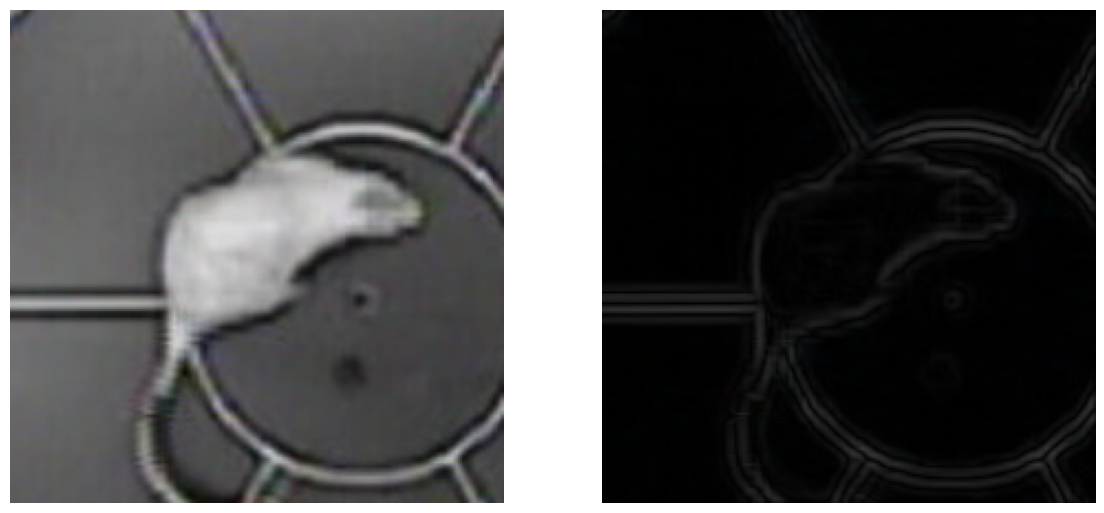

In [5]:
filtered_pic = skimage.filters.prewitt(orig_pic_array)

plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_pic, cmap=plt.cm.gray)
plt.axis('off')

#### Фильтр Собеля

(-0.5, 223.5, 223.5, -0.5)

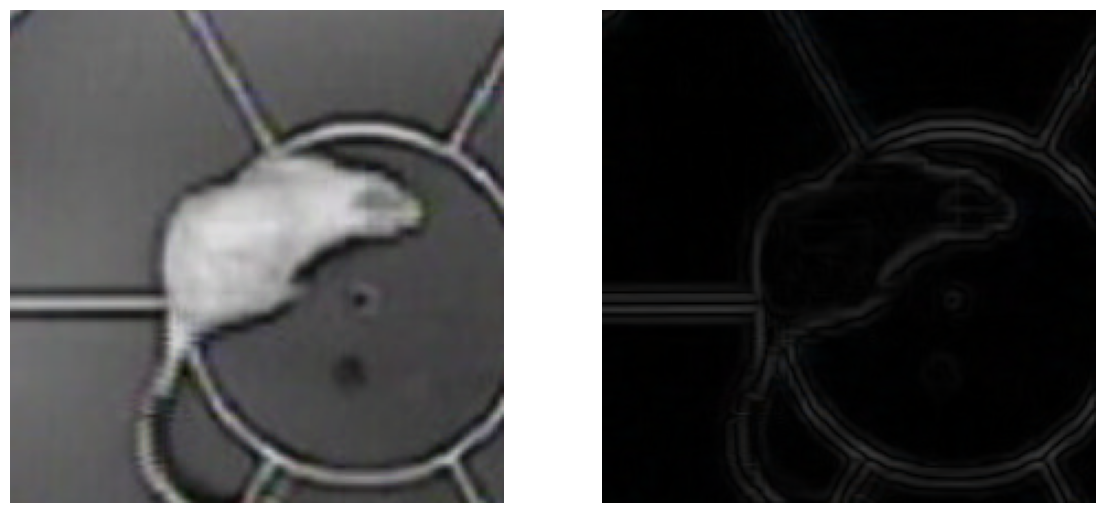

In [6]:
filtered_pic = skimage.filters.sobel(orig_pic_array)

plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_pic, cmap=plt.cm.gray)
plt.axis('off')

#### Фильтр Лапласа

In [7]:
def LoG_filter(image, sigma, size=None):
    # ядро LoG
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(- size // 2 + 1, size // 2 + 1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(- (x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    result = ndimage.convolve(image, kernel)
    return result

(-0.5, 223.5, 223.5, -0.5)

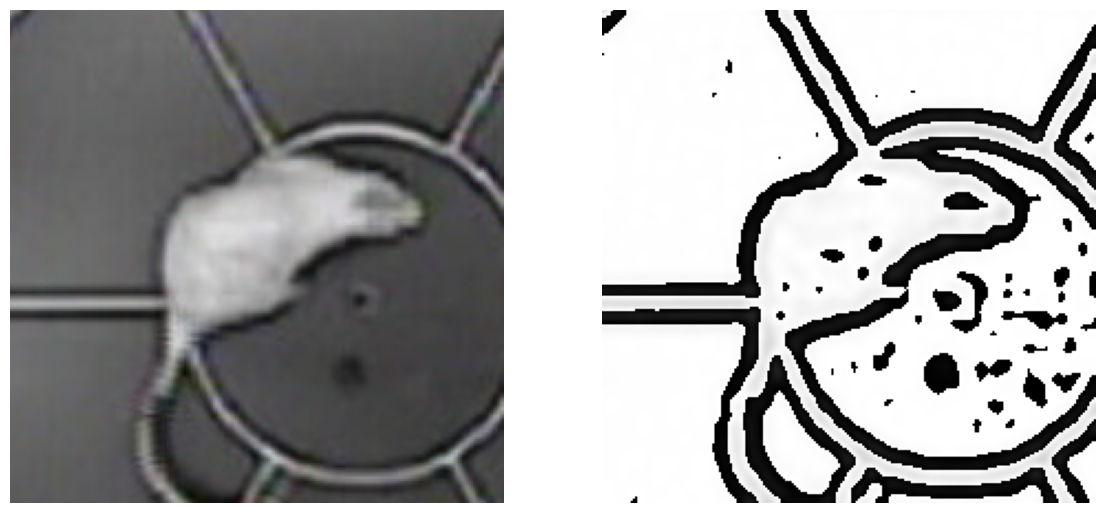

In [8]:
pic_mono = orig_pic.convert("L")
filtered_pic = LoG_filter(pic_mono, 3)

plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_pic, cmap=plt.cm.gray)
plt.axis('off')

***

### Выделение областей

In [9]:
from sklearn.cluster import MeanShift, estimate_bandwidth

#### MeanShift

In [10]:
reshaped_image = np.reshape(orig_pic_array, [-1, 3])
bandwidth = estimate_bandwidth(reshaped_image, quantile=0.25, n_samples=1000)

msc = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msc.fit(reshaped_image)

labels = msc.labels_
result_image = np.reshape(labels, orig_pic_array.shape[:2])

(-0.5, 223.5, 223.5, -0.5)

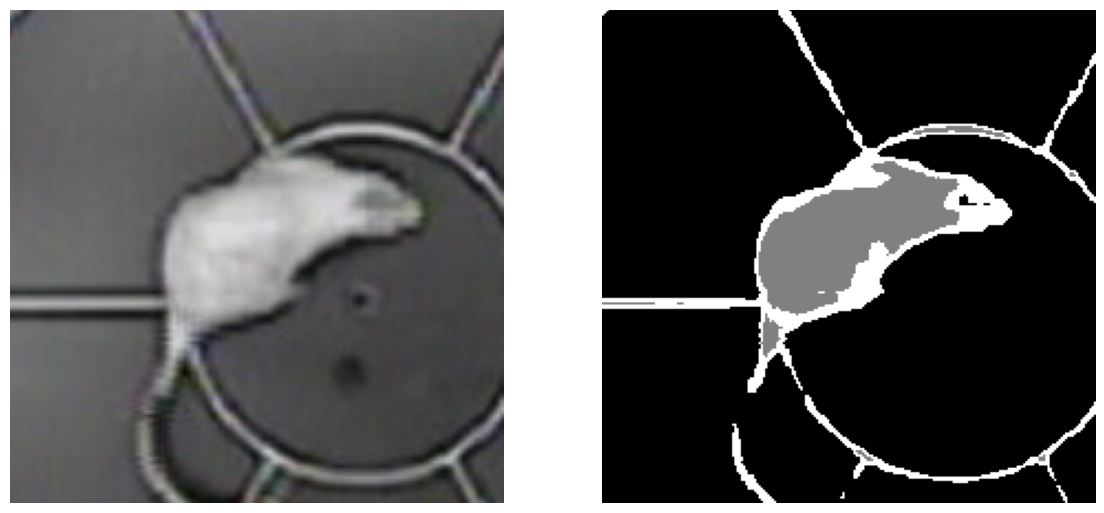

In [11]:
plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap=plt.cm.gray)
plt.axis('off')

#### Floodfill

(-0.5, 223.5, 223.5, -0.5)

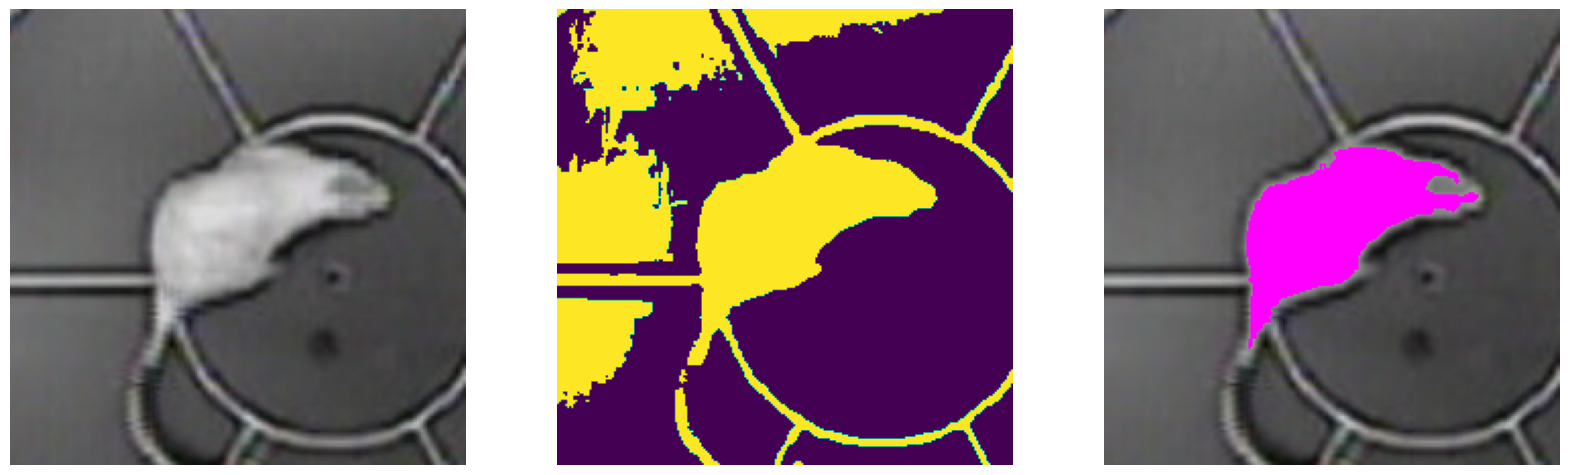

In [12]:
copy_img = orig_pic_array.copy()
h, w = copy_img.shape[:2]

mask = np.zeros([h + 2, w + 2], np.uint8)
seed = (100, 100)
fill_color = (255, 0, 255)
lo_diff = (80, 80, 80)
up_diff = (90, 90, 90)
lower_bound = 100
upper_bound = 100

(thresh, BnW_image) = cv2.threshold(np.array(orig_pic.convert("L")), lower_bound, upper_bound, cv2.THRESH_BINARY)
threshold_img = PIL.Image.fromarray(BnW_image)

cv2.floodFill(copy_img, mask, seed, fill_color, lo_diff, up_diff, cv2.FLOODFILL_FIXED_RANGE)

plt.figure(figsize=(20, 10), frameon=False)

plt.subplot(1, 3, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(threshold_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(copy_img, cmap=plt.cm.gray)
plt.axis('off')

***

### Шумы

#### Гауссов шум

(-0.5, 223.5, 223.5, -0.5)

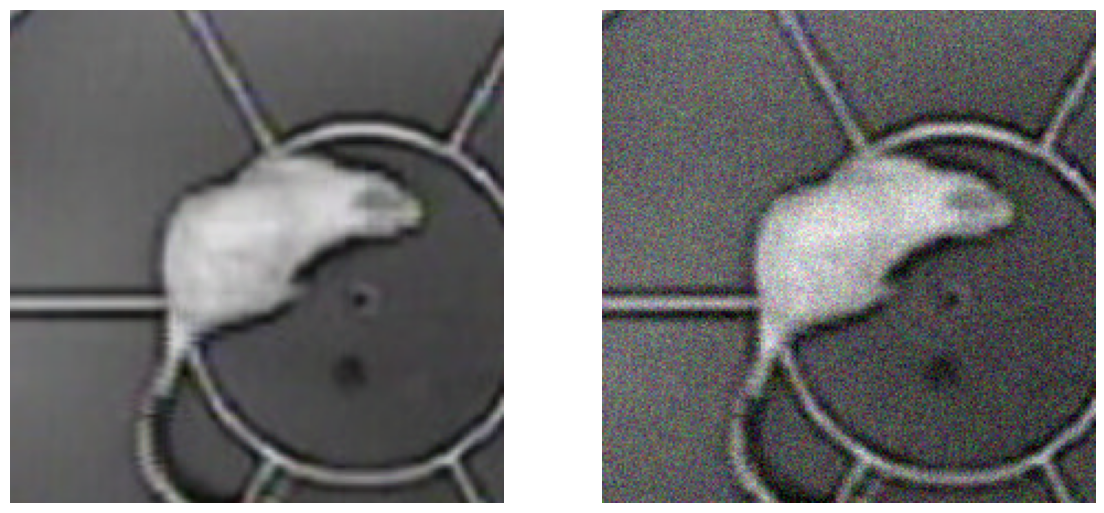

In [13]:
intencity = 0.4

noise = np.random.normal(0, 50, orig_pic_array.shape) 
img_noised = orig_pic_array + intencity*noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_noised)
plt.axis('off')

#### Импульсный шум

In [14]:
s = 700
intencity = 0.8

copy_img = orig_pic_array.copy()
noise_sample = np.random.default_rng().uniform(low=200, high=250, size=(s, 3))

h, w = orig_pic_array.shape[:2]
rs1 = np.random.randint(0, copy_img.shape[1] - 1, s)
rs2 = np.random.randint(0, copy_img.shape[0] - 1, s)


for i, val in enumerate(noise_sample):
    copy_img[rs2[i]][rs1[i]][:] += (val*intencity).astype(np.uint8)

(-0.5, 223.5, 223.5, -0.5)

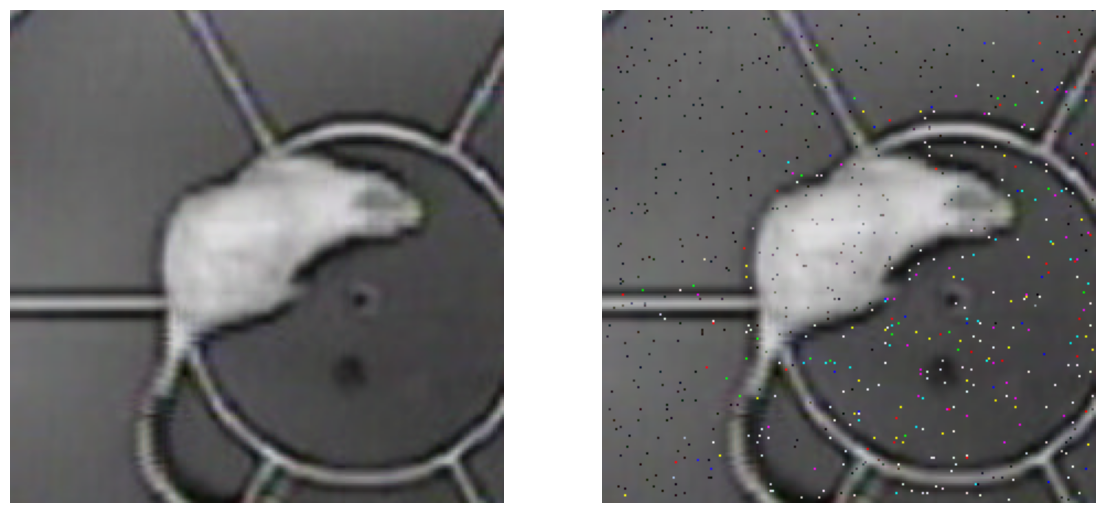

In [15]:
plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(copy_img)
plt.axis('off')

#### Шум соли и перца

In [16]:
img_size = orig_pic_array.size
noise_percentage = 0.1
noise_size = int(noise_percentage*img_size)

random_indices = np.random.choice(img_size, noise_size)
copy_img = orig_pic_array.copy()
noise = np.random.choice([orig_pic_array.min(), orig_pic_array.max()], noise_size)
copy_img.flat[random_indices] = noise

(-0.5, 223.5, 223.5, -0.5)

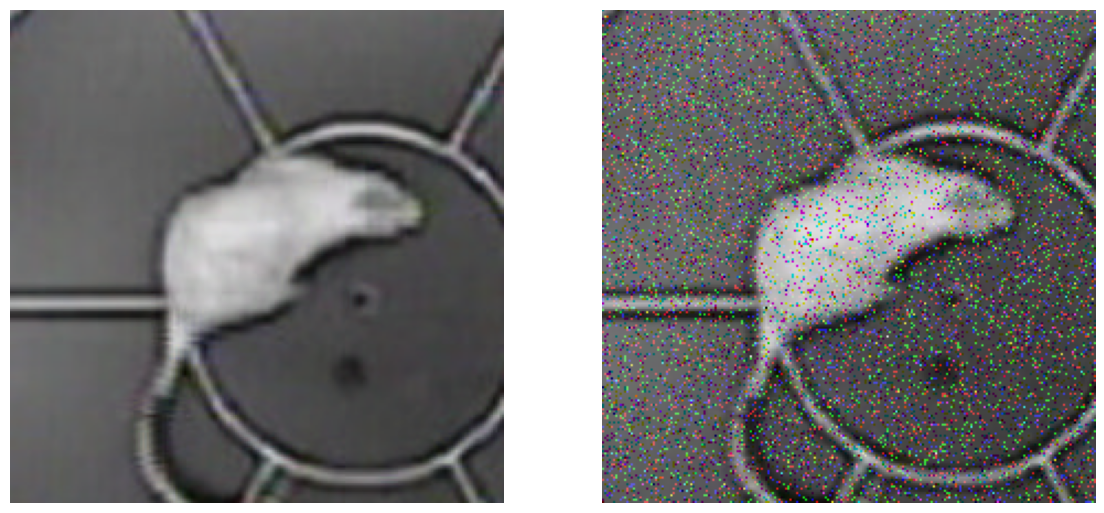

In [17]:
plt.figure(figsize=(14, 10), frameon=False)

plt.subplot(1, 2, 1)
plt.imshow(orig_pic_array)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(copy_img)
plt.axis('off')

---

### Удаление шумов 

In [40]:
img = cv2.imread('../data/class_black_mouse_OFT_gray_back/OFT_control_01$000152&03_F00175_a_.bmp')

In [41]:
intencity = 0.4

noise = np.random.normal(0, 50, orig_pic_array.shape) 
img_noised = img + intencity*noise
img_noised = np.clip(img_noised, 0, 255).astype(np.uint8)

In [82]:
dst_intencity = 20

dst = cv2.fastNlMeansDenoisingColored(img_noised, None, hColor=dst_intencity, h=dst_intencity)

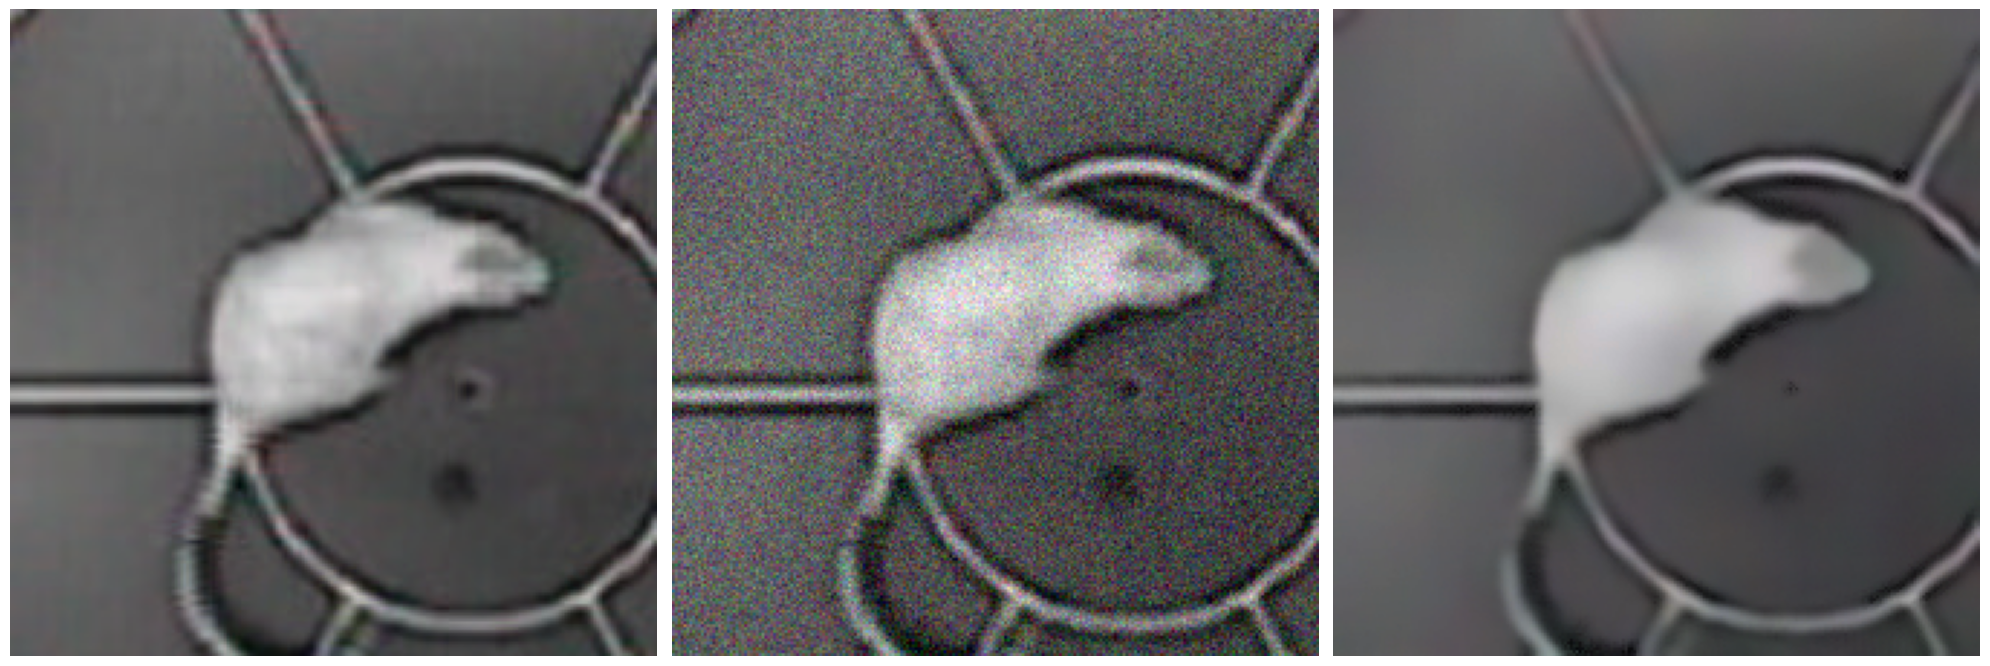

In [83]:
plt.figure(figsize=(20, 10), frameon=False)

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_noised)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dst)
plt.axis('off')

plt.tight_layout()